In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as pl
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [2]:
G=nx.Graph()

In [5]:
e=[(1,2, 7),(1,3,9),(1,6, 14),
  (2, 3, 10),(2, 4, 15), (4, 5, 6),
   
   
   
   (3, 6, 2), (3, 4, 11), (6, 5, 9)]

G=nx.Graph()

G.add_weighted_edges_from(e)
print(nx.dijkstra_path(G,1,5))


[1, 3, 6, 5]


In [4]:
e[0][0]

1

In [5]:
def len_k(e):
    k = []
    for i in e:
        k.append(i[0])
        k.append(i[1])
    return len(set(k))
def start_a(n):
    a = []
    for i in range(len_k(e)):
        if i == n - 1: a.append(1)
        else:
            a.append(0)
    return a
def start_b(n,m): 
    b = m[n-1] 
    return b
def start_c():
    c = []
    for i in range(len_k(e)): c.append(1)
    return c

In [6]:
#Функция определяет список нерассмотренных вершин
def list_k(a):
    k = []
    for i in range(len_k(e)):
        if a[i] == 0: k.append(i+1)
    return k

#Функция определяет минимальное ребро среди нерассмотренных вершин
def min_b(a,b):
    minb = max(b)
    for i in list_k(a):
        if b[i-1] < minb and not b[i-1] == 0: minb = b[i-1]
    return minb
        
#Функция определяет вершину для следующего шага
def min_step(a,b):
    for i in list_k(a):
        if min_b(a,b) == b[i-1]: min_step = i
    return min_step

In [7]:
def min_step_graph(e,start, finish, pr = 0):
    m=np.zeros((len_k(e), len_k(e)))
    for i in range(len_k(e)):
        for j in range(len_k(e)):
            if not i==j: m[i][j] = np.inf
    for i in e:
        m[i[0]-1][i[1]-1] = i[2]
        m[i[1]-1][i[0]-1] = i[2]
    if pr == 1:
        print(np.array(m))
        print('')
    
    a = start_a(start)
    b = start_b(start,m)
    c = start_c()
    if pr == 1:
        print(a)
        print(b)
        print(c)
        print('')
    
    for i in range(len_k(e)-1):
        m_b = min_b(a,b)
        last_min_step = min_step(a,b)
        a[last_min_step - 1] = 1
        for i in list_k(a):
            if b[i-1] > m[last_min_step-1][i-1] + m_b: 
                b[i-1] = m[last_min_step-1][i-1] + m_b
                c[i-1] = last_min_step
        if pr == 1:
            print(a)
            print(b)  ## Для наглядности печатаем все шаги
            print(c)
            print('')
    
    ## На выходе дадим конкретный путь
    path = []
    path.append(finish)
    while not finish == start:
        path.append(c[finish-1])
        finish = c[finish-1]
    
    return path
    

In [8]:
## Последний параметр отвечет за вывод результатов на каждом шаге (при 1)
min_step_graph(e,1,5)

[5, 6, 3, 1]

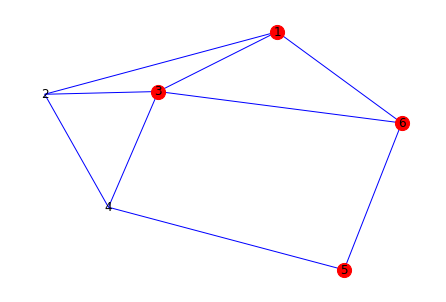

In [9]:
nx.draw(G, node_color = 'r', with_labels=True, nodelist=min_step_graph(e,1,5), edge_color='b', node_size = 200)

In [10]:
??nx.draw

In [11]:
from pyvis.network import Network

ModuleNotFoundError: No module named 'pyvis'

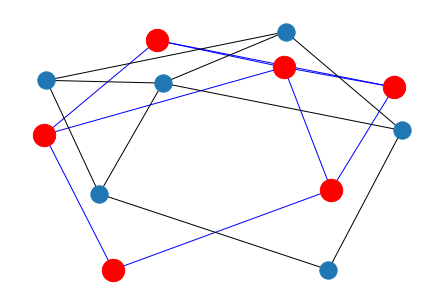

In [11]:
pos = nx.spring_layout(G, seed = 5)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw(G, node_color = 'r', edge_color='b', node_size = 500)




In [60]:
len(min_step_graph(e,1,5))

4

In [73]:
nx.shortest_path(G, source=1, target=5, weight='weight')

[1, 3, 6, 5]

[5]
[5, 6]
[5, 6, 3]
[5, 6, 3, 1]


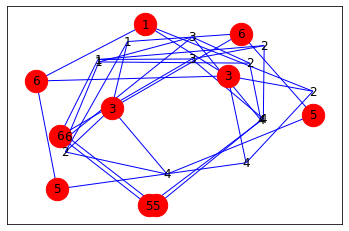

In [26]:
l=[]
for i in range(len(min_step_graph(e,1,5))):
    l.append(min_step_graph(e,1,5)[i])
    nx.draw_networkx(G, node_color = 'r', nodelist=l, with_labels=True, edge_color='b', node_size = 500)
    time.sleep(1)
    print(l)

None


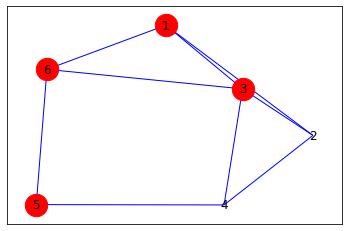

In [27]:
print(nx.draw_networkx(G, node_color = 'r', nodelist=l, with_labels=True, edge_color='b', node_size = 500))